# Assignment 1 - Preparing the train, test and validation sets

In [28]:
import random
import nltk
import re
import numpy as np
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/sneha/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
X = []
Y = []

file = open("neg.txt","r",encoding='utf-8')
X += file.read().split("\n")
Y += ["negative"]*len(X)

file = open("pos.txt","r",encoding='utf-8')
X += file.read().split("\n")
Y += ["positive"]*len(X)

In [23]:
# Assignment 1 - Data Preparation
def preprocess_with_stop(text):
    punctuations = ["!","#","$","%","&",",","(",")","*","+","/",":",";",".","<","=",">","@","[","\\","]","^","`","{","|","}","~","\t","\n"]
    with_stop = []
    
    for token in text:
        sentence = token.split(" ")
        wo_stop = []
        for words in sentence:
            if words not in punctuations:
                wo_stop.append(words)
                
        with_stop.append(' '.join(wo_stop))
        
    return with_stop

In [24]:
def preprocess_filtered(text):
    punctuations = ["!","#","$","%","&",",","(",")","*","+","/",":",";",".","<","=",">","@","[","\\","]","^","`","{","|","}","~","\t","\n"]
    filtered = []  
    
    for token in text:
        sentence = token.split(" ")
        wo_stop = []
        for words in sentence:
            if words not in punctuations and words not in stopwords.words('english'):
                wo_stop.append(words)
                
        filtered.append(' '.join(wo_stop))
        
    return filtered

In [25]:
X_w_stop = preprocess_with_stop(X)
X_wo_stop = preprocess_filtered(X)

In [26]:
train_split = 0.8
test_split = 0.1
data = list(zip(X_w_stop, Y))

# Shuffle the combined data
random.shuffle(data)

# Determine the split sizes
train_size = int(train_split * len(data))
test_size = int(test_split * len(data))
val_size = len(data) - train_size - test_size

# Split the data
train_data = data[:train_size]
test_data = data[train_size:train_size + test_size]
val_data = data[train_size + test_size:]

# Unzip the combined data into separate lists
X_train, Y_train = zip(*train_data)
X_test, Y_test = zip(*test_data)
X_val, Y_val = zip(*val_data)

# Convert them back to lists (optional, as zip returns tuples)
X_train, Y_train = list(X_train), list(Y_train)
X_test, Y_test = list(X_test), list(Y_test)
X_val, Y_val = list(X_val), list(Y_val)

np.savetxt('train.csv', [p for p in zip(X_train, Y_train)], delimiter=',', fmt='%s')
np.savetxt('test.csv', [p for p in zip(X_test, Y_test)], delimiter=',', fmt='%s')
np.savetxt('val.csv', [p for p in zip(X_val, Y_val)], delimiter=',', fmt='%s')

In [27]:
train_split = 0.8
test_split = 0.1
data = list(zip(X_wo_stop, Y))

# Shuffle the combined data
random.shuffle(data)

# Determine the split sizes
train_size = int(train_split * len(data))
test_size = int(test_split * len(data))
val_size = len(data) - train_size - test_size

# Split the data
train_data = data[:train_size]
test_data = data[train_size:train_size + test_size]
val_data = data[train_size + test_size:]

# Unzip the combined data into separate lists
X_train, Y_train = zip(*train_data)
X_test, Y_test = zip(*test_data)
X_val, Y_val = zip(*val_data)

# Convert them back to lists (optional, as zip returns tuples)
X_train, Y_train = list(X_train), list(Y_train)
X_test, Y_test = list(X_test), list(Y_test)
X_val, Y_val = list(X_val), list(Y_val)

np.savetxt('train_ns.csv', [p for p in zip(X_train, Y_train)], delimiter=',', fmt='%s')
np.savetxt('test_ns.csv', [p for p in zip(X_test, Y_test)], delimiter=',', fmt='%s')
np.savetxt('val_ns.csv', [p for p in zip(X_val, Y_val)], delimiter=',', fmt='%s')

In [30]:
out = [re.sub('\s+', ',', sentence) for sentence in X_w_stop]
np.savetxt('out.csv', [p for p in out], fmt='%s')

In [31]:
out = [re.sub('\s+', ',', sentence) for sentence in X_wo_stop]
np.savetxt('out_ns.csv', [p for p in out], fmt='%s')

In [48]:
s = "I am! need"
separate_chars = ",!"
pattern = f"[{re.escape(separate_chars)}]|\\w+"

# Find all matches according to the pattern
split_string = re.findall(pattern, s)


In [49]:
split_string

['I', 'am', '!', 'need']

# Assignment 2 - Training the models

## Without Stopwords

In [276]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
import pandas as pd
import pickle

In [234]:
df = pd.read_csv('data/train_ns.csv',header=None, names=['Text','Target'])
df.head()

,Text,Target
0,I worry cord getting caught anything,positive
1,This product maybe fine pouring ice cream etc ...,negative
2,I tried enthusiastic slow graphics dated looki...,negative
3,I used four managed leave marks sensor,negative
4,It comes screen protector well I used glare pr...,positive


In [235]:
df['Review'] = df['Target'].map({
    'positive':1,
    'negative':0
})

In [236]:
df.head()

,Text,Target,Review
0,I worry cord getting caught anything,positive,1
1,This product maybe fine pouring ice cream etc ...,negative,0
2,I tried enthusiastic slow graphics dated looki...,negative,0
3,I used four managed leave marks sensor,negative,0
4,It comes screen protector well I used glare pr...,positive,1


In [237]:
X_train = df.iloc[:,0]
y_train = df.iloc[:,-1]

In [238]:
df_test = pd.read_csv('data/test_ns.csv',header=None, names=['Text','Target'])
df_test.head()

,Text,Target
0,It nice less 5 different size tips used none i...,negative
1,I giving 4 stars instead 5 metal flaking,positive
2,The Tomato Chipotle flavor little chipotle war...,negative
3,I returned mine go size 40 I would need least ...,negative
4,The conversations listen sappy boring,negative


In [239]:
df_test['Review'] = df['Target'].map({
    'positive':1,
    'negative':0
})

In [240]:
X_test = df_test.iloc[:,0]
y_test = df_test.iloc[:,-1]

In [241]:
df_val = pd.read_csv('data/val_ns.csv',header=None, names=['Text','Target'])
df_val['Review'] = df['Target'].map({
    'positive':1,
    'negative':0
})
X_val = df_val.iloc[:,0]
y_val = df_val.iloc[:,-1]

In [242]:
X_train.shape, y_train.shape

((640001,), (640001,))

In [243]:
X_train.dtype

dtype('O')

### Unigrams

In [244]:
# no stop words and unigrams
cv = CountVectorizer(ngram_range=(1,1))
X_train_cv = cv.fit_transform(df['Text'].values.astype('U'))
X_test_cv = cv.transform(df_test['Text'].values.astype('U'))
X_valid_cv = cv.transform(df_val['Text'].values.astype('U'))

mnb_uni = MultinomialNB(alpha=10)
mnb_uni.fit(X_train_cv, df['Review'])

y_pred_p = mnb_uni.predict(X_test_cv)

print(accuracy_score(df_test['Review'], y_pred_p), ": is the accuracy score")

0.5020625 : is the accuracy score


In [286]:
pickle.dump(mnb_uni , open('mnb_uni.pkl' , 'wb'))

### Hyperparameter tuning based on validation set

In [245]:
from sklearn.model_selection import GridSearchCV
param={'alpha': [0.00001, 0.0001, 0.001, 0.1, 1, 10, 100,1000]}   
clf=GridSearchCV(mnb_uni,param,scoring='roc_auc',cv=10,return_train_score=True)
clf.fit(X_valid_cv, df_val['Review'])

GridSearchCV(cv=10, estimator=MultinomialNB(alpha=10),
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.1, 1, 10, 100,
                                   1000]},
             return_train_score=True, scoring='roc_auc')

In [246]:
print(clf.best_estimator_)

MultinomialNB(alpha=10)


### Bigrams

In [250]:
# no stop words and bigrams
cv = CountVectorizer(ngram_range=(2,2))
X_train_cv = cv.fit_transform(df['Text'].values.astype('U'))
X_test_cv = cv.transform(df_test['Text'].values.astype('U'))
X_valid_cv = cv.transform(df_val['Text'].values.astype('U'))

mnb_bi = MultinomialNB(alpha=0.001)
mnb_bi.fit(X_train_cv, df['Review'])

y_pred_p = mnb_bi.predict(X_test_cv)

print(accuracy_score(df_test['Review'], y_pred_p), ": is the accuracy score")

0.5016875 : is the accuracy score


In [285]:
pickle.dump(mnb_bi , open('mnb_bi.pkl' , 'wb'))

In [248]:
from sklearn.model_selection import GridSearchCV
param={'alpha': [0.00001, 0.0001, 0.001, 0.1, 1, 10, 100,1000]}   
clf=GridSearchCV(mnb_bi,param,scoring='roc_auc',cv=10,return_train_score=True)
clf.fit(X_valid_cv, df_val['Review'])

GridSearchCV(cv=10, estimator=MultinomialNB(),
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.1, 1, 10, 100,
                                   1000]},
             return_train_score=True, scoring='roc_auc')

In [249]:
print(clf.best_estimator_)

MultinomialNB(alpha=0.001)


### Unigrams+Bigrams

In [255]:
# no stop words and unigrams+bigrams
cv = CountVectorizer(ngram_range=(1,2))
X_train_cv = cv.fit_transform(df['Text'].values.astype('U'))
X_test_cv = cv.transform(df_test['Text'].values.astype('U'))
X_valid_cv = cv.transform(df_val['Text'].values.astype('U'))

mnb_uni_bi = MultinomialNB(alpha=10)
mnb_uni_bi.fit(X_train_cv, df['Review'])

y_pred_p = mnb_uni_bi.predict(X_test_cv)

print(accuracy_score(df_test['Review'], y_pred_p), ": is the accuracy score")

0.5024375 : is the accuracy score


In [284]:
pickle.dump(mnb_uni_bi , open('mnb_uni_bi.pkl' , 'wb'))

In [252]:
from sklearn.model_selection import GridSearchCV
param={'alpha': [0.00001, 0.0001, 0.001, 0.1, 1, 10, 100,1000]}   
clf=GridSearchCV(mnb_uni_bi,param,scoring='roc_auc',cv=10,return_train_score=True)
clf.fit(X_valid_cv, df_val['Review'])

GridSearchCV(cv=10, estimator=MultinomialNB(),
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.1, 1, 10, 100,
                                   1000]},
             return_train_score=True, scoring='roc_auc')

In [253]:
print(clf.best_estimator_)

MultinomialNB(alpha=10)


## With Stopwords

In [254]:
df_sw = pd.read_csv('data/train.csv',header=None, names=['Text','Target'])
df_sw['Review'] = df_sw['Target'].map({
    'positive':1,
    'negative':0
})
df_sw.head()

,Text,Target,Review
0,I can actually WHISPER and it picks up,positive,1
1,You would think that once you get past that an...,negative,0
2,It is a side scrolling game where you play as ...,negative,0
3,This one feels more powerful when I used it to...,positive,1
4,In particular I had to look up the definition ...,negative,0


In [256]:
df_sw_test = pd.read_csv('data/test.csv',header=None, names=['Text','Target'])
df_sw_test['Review'] = df_sw_test['Target'].map({
    'positive':1,
    'negative':0
})
df_sw_test.head()

,Text,Target,Review
0,7 90 per 2 pound bag So worth it Also comes fr...,negative,0
1,As it stands now I can only readily see the la...,positive,1
2,They re like eating crunchy dust The cheese is...,negative,0
3,I have sidestepped watery milk by allowing it ...,positive,1
4,The slow motion Focus mode that was made famou...,negative,0


In [257]:
df_sw_val = pd.read_csv('data/val.csv',header=None, names=['Text','Target'])
df_sw_val['Review'] = df_sw_val['Target'].map({
    'positive':1,
    'negative':0
})
df_sw_val.head()

,Text,Target,Review
0,Being a veteran technician this wasn t a concern,negative,0
1,Didn t fit my iPhone 4 in the least,negative,0
2,This is a simple product that does just what y...,positive,1
3,But I need a stock broom to clean up the littl...,positive,1
4,The color is rubbing off revealing what appear...,negative,0


### Unigrams

In [265]:
# stop words and unigrams
cv = CountVectorizer(ngram_range=(1,1))
X_train_cv = cv.fit_transform(df_sw['Text'].values.astype('U'))
X_test_cv = cv.transform(df_sw_test['Text'].values.astype('U'))
X_valid_cv = cv.transform(df_sw_val['Text'].values.astype('U'))

mnb_uni_ns = MultinomialNB(alpha=1000)
mnb_uni_ns.fit(X_train_cv, df_sw['Review'])

y_pred = mnb_uni_ns.predict(X_test_cv)

print(accuracy_score(df_sw_test['Review'], y_pred), ": is the accuracy score")

0.752925 : is the accuracy score


In [283]:
pickle.dump(mnb_uni_ns , open('mnb_uni_ns.pkl' , 'wb'))

In [266]:
from sklearn.model_selection import GridSearchCV
param={'alpha': [0.00001, 0.0001, 0.001, 0.1, 1, 10, 100,1000]}   
clf=GridSearchCV(mnb_uni_ns,param,scoring='roc_auc',cv=10,return_train_score=True)
clf.fit(X_valid_cv, df_val['Review'])

GridSearchCV(cv=10, estimator=MultinomialNB(alpha=1000),
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.1, 1, 10, 100,
                                   1000]},
             return_train_score=True, scoring='roc_auc')

In [267]:
print(clf.best_estimator_)

MultinomialNB(alpha=1000)


### Bigrams

In [271]:
# stop words and bigrams
cv = CountVectorizer(ngram_range=(2,2))
X_train_cv = cv.fit_transform(df_sw['Text'].values.astype('U'))
X_test_cv = cv.transform(df_sw_test['Text'].values.astype('U'))
X_valid_cv = cv.transform(df_sw_val['Text'].values.astype('U'))

mnb_bi_ns = MultinomialNB(alpha=1000)
mnb_bi_ns.fit(X_train_cv, df_sw['Review'])

y_pred = mnb_bi_ns.predict(X_test_cv)

print(accuracy_score(df_sw_test['Review'], y_pred), ": is the accuracy score")

0.7222 : is the accuracy score


In [282]:
pickle.dump(mnb_bi_ns , open('mnb_bi_ns.pkl' , 'wb'))

In [269]:
from sklearn.model_selection import GridSearchCV
param={'alpha': [0.00001, 0.0001, 0.001, 0.1, 1, 10, 100,1000]}   
clf=GridSearchCV(mnb_bi_ns,param,scoring='roc_auc',cv=10,return_train_score=True)
clf.fit(X_valid_cv, df_val['Review'])

GridSearchCV(cv=10, estimator=MultinomialNB(),
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.1, 1, 10, 100,
                                   1000]},
             return_train_score=True, scoring='roc_auc')

In [270]:
print(clf.best_estimator_)

MultinomialNB(alpha=1000)


### Unigrams+Bigrams

In [275]:
# stop words and unigrams+bigrams
cv = CountVectorizer(ngram_range=(1,2))
X_train_cv = cv.fit_transform(df_sw['Text'].values.astype('U'))
X_test_cv = cv.transform(df_sw_test['Text'].values.astype('U'))
X_valid_cv = cv.transform(df_sw_val['Text'].values.astype('U'))

mnb_uni_bi_ns = MultinomialNB(alpha=1)
mnb_uni_bi_ns.fit(X_train_cv, df_sw['Review'])

y_pred = mnb_uni_bi_ns.predict(X_test_cv)

print(accuracy_score(df_sw_test['Review'], y_pred), ": is the accuracy score")

0.8330625 : is the accuracy score


In [281]:
pickle.dump(mnb_uni_bi_ns , open('mnb_uni_bi_ns.pkl' , 'wb'))

### Hyperparameter tuning based on validation set

In [273]:
from sklearn.model_selection import GridSearchCV
param={'alpha': [0.00001, 0.0001, 0.001, 0.1, 1, 10, 100,1000]}   
clf=GridSearchCV(mnb_uni_bi_ns,param,scoring='roc_auc',cv=10,return_train_score=True)
clf.fit(X_valid_cv, df_sw_val['Review'])

GridSearchCV(cv=10, estimator=MultinomialNB(),
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.1, 1, 10, 100,
                                   1000]},
             return_train_score=True, scoring='roc_auc')

In [274]:
print(clf.best_estimator_)

MultinomialNB(alpha=1)


# Assignment 3 - Word2Vec model using Gensim

In [53]:
!pip install "scipy<1.13"

In [1]:
import scipy 
print(scipy.__version__)

1.12.0


In [110]:
df_sw = pd.read_csv('data/train.csv',header=None, names=['Text','Target'])
df_sw['Review'] = df_sw['Target'].map({
    'positive':1,
    'negative':0
})
df_sw.head()

,Text,Target,Review
0,I can actually WHISPER and it picks up,positive,1
1,You would think that once you get past that an...,negative,0
2,It is a side scrolling game where you play as ...,negative,0
3,This one feels more powerful when I used it to...,positive,1
4,In particular I had to look up the definition ...,negative,0


In [3]:
from gensim.models import Word2Vec, KeyedVectors
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize

In [6]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/sneha/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [7]:
reviews = df_sw['Text'].values

In [8]:
reviewsVec = [word_tokenize(str(review)) for review in reviews]

In [9]:
len(reviewsVec)

640001

In [208]:
w2v_model = Word2Vec(reviewsVec, window=2, min_count=1,vector_size=32)

In [209]:
w2v_model.build_vocab(reviewsVec)

In [210]:
w2v_model.corpus_count

640001

In [211]:
w2v_model.train(reviewsVec, total_examples=w2v_model.corpus_count, epochs=w2v_model.epochs)

(37884049, 49983750)

In [220]:
w2v_model.wv.vectors.shape

(102118, 32)

In [212]:
sentence_vectors = []
for review in reviewsVec:
    word_vectors = w2v_model.wv.get_mean_vector(review)
    sentence_vectors.append(word_vectors)

In [213]:
len(sentence_vectors)

640001

In [214]:
type(sentence_vectors[0])

numpy.ndarray

In [15]:
w2v_model.wv.most_similar('good',topn = 20)

[('decent', 0.8887338638305664),
 ('great', 0.8630195260047913),
 ('fantastic', 0.829734742641449),
 ('nice', 0.8114767074584961),
 ('reasonable', 0.7931802272796631),
 ('amazing', 0.7854602932929993),
 ('wonderful', 0.7723184823989868),
 ('awesome', 0.7517264485359192),
 ('cool', 0.7513390779495239),
 ('useful', 0.7487989068031311),
 ('impressive', 0.7486128807067871),
 ('fabulous', 0.7423993945121765),
 ('neat', 0.7382122278213501),
 ('perfect', 0.7367144227027893),
 ('superb', 0.73368901014328),
 ('ok', 0.7328500747680664),
 ('okay', 0.7326178550720215),
 ('terrific', 0.7319403290748596),
 ('excellent', 0.7230440378189087),
 ('bad', 0.7212103605270386)]

In [16]:
w2v_model.wv.most_similar('bad',topn = 20)

[('horrible', 0.7566577792167664),
 ('disappointing', 0.7557305097579956),
 ('sad', 0.7508942484855652),
 ('obvious', 0.7500917911529541),
 ('stupid', 0.7377457618713379),
 ('strange', 0.7289218306541443),
 ('good', 0.7212103009223938),
 ('terrible', 0.7146079540252686),
 ('awful', 0.7144171595573425),
 ('weak', 0.7042959332466125),
 ('funny', 0.7024308443069458),
 ('silly', 0.6992471218109131),
 ('upset', 0.6929012537002563),
 ('weird', 0.69100421667099),
 ('interesting', 0.6769205331802368),
 ('fair', 0.6744942665100098),
 ('poor', 0.6728766560554504),
 ('disappointed', 0.671014666557312),
 ('worthless', 0.6641150712966919),
 ('helpful', 0.662361204624176)]

In [23]:
my_dict = dict({})
words = list(w2v_model.wv.index_to_key)
for idx, key in enumerate(words):
    my_dict[key] = w2v_model.wv[key]
    # Or my_dict[key] = model.wv.get_vector(key)
    # Or my_dict[key] = model.wv.word_vec(key, use_norm=False)

In [24]:
my_dict

{'the': array([ 0.40041506,  0.5795368 , -0.2522597 ,  1.4649179 , -0.12508221,
        -1.4543943 ,  0.5318583 ,  3.6727176 ,  1.7284639 , -2.1962137 ,
         1.2854099 ,  0.31757692, -0.31977123, -2.3267913 ,  0.42870742,
        -0.92578304, -1.8567348 , -0.05702604, -1.4628509 , -2.831561  ,
        -2.6600413 ,  0.1511576 , -2.2010818 , -1.2231932 , -2.594893  ,
        -0.6865035 ,  0.30999082,  3.0099676 ,  0.6303493 ,  1.323957  ,
        -1.1821406 ,  4.875002  ], dtype=float32),
 'I': array([ 3.5435255 , -0.05178604, -3.192556  ,  1.0804262 ,  2.822101  ,
        -1.222212  ,  2.0662205 ,  1.6433592 , -1.0612215 ,  3.595322  ,
        -3.2942915 ,  1.6611221 , -0.02387702, -3.6124578 , -3.9185016 ,
        -1.3396828 ,  1.1400098 ,  3.8993745 , -3.52592   , -4.105263  ,
         0.5991336 , -1.2905831 , -5.1011896 , -3.5849173 , -1.3306214 ,
        -4.127062  ,  0.6252031 ,  5.323038  ,  3.0161653 ,  1.4309113 ,
         0.6799639 , -0.5556981 ], dtype=float32),
 'and': ar

In [20]:
sentence_vectors = []
for st in reviewsVec:
    for 
    if st1 in w2v_model.wv:
        sentence_vectors.append(w2v_model.wv[st1])

['I', 'can', 'actually', 'WHISPER', 'and', 'it', 'picks', 'up']


TypeError: unhashable type: 'list'

# Assignment 4 - Neural network

In [177]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Input, Dropout, Embedding
from keras import regularizers
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau

import matplotlib.pyplot as plt
%matplotlib inline

In [215]:
df_sw_val = pd.read_csv('data/val.csv',header=None, names=['Text','Target'])
df_sw_val['Review'] = df_sw_val['Target'].map({
    'positive':1,
    'negative':0
})
df_sw_val.head()

,Text,Target,Review
0,Being a veteran technician this wasn t a concern,negative,0
1,Didn t fit my iPhone 4 in the least,negative,0
2,This is a simple product that does just what y...,positive,1
3,But I need a stock broom to clean up the littl...,positive,1
4,The color is rubbing off revealing what appear...,negative,0


In [216]:
reviewsVal = df_sw_val['Text'].values 
reviewsVecVal = [word_tokenize(str(review)) for review in reviewsVal]

sentence_vectors_val = []
for review in reviewsVecVal:
    word_vectors_val = w2v_model.wv.get_mean_vector(review)
    sentence_vectors_val.append(word_vectors_val)

In [163]:
def gensim_to_keras_embedding(model, train_embeddings=False):
    """Get a Keras 'Embedding' layer with weights set from Word2Vec model's learned word embeddings.

    Parameters
    ----------
    train_embeddings : bool
        If False, the returned weights are frozen and stopped from being updated.
        If True, the weights can / will be further updated in Keras.

    Returns
    -------
    `keras.layers.Embedding`
        Embedding layer, to be used as input to deeper network layers.

    """
    vectors = model.wv  # structure holding the result of training
    weights = vectors.vectors  # vectors themselves, a 2D numpy array    
    index_to_key = vectors.index_to_key  # which row in `weights` corresponds to which word?

    layer = Embedding(
        input_dim=weights.shape[0],
        output_dim=weights.shape[1],
        input_length=100,
        weights=[weights],
        trainable=train_embeddings,
    )
    return layer

In [217]:
len(w2v_model.wv)

102118

In [232]:
model = Sequential()
embedding_layer = Embedding(input_dim=len(w2v_model.wv),output_dim=8,input_length=32)
model.add(embedding_layer)
model.add(Flatten())
model.add(Dense(6,activation='relu',kernel_regularizer=regularizers.L2(0.01)))
model.add(Dropout(0.3))
model.add(Dense(1,activation='softmax'))

In [222]:
model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_17 (Embedding)    (None, 32, 8)             816944    
                                                                 
 flatten_8 (Flatten)         (None, 256)               0         
                                                                 
 dense_31 (Dense)            (None, 6)                 1542      
                                                                 
 dropout_12 (Dropout)        (None, 6)                 0         
                                                                 
 dense_32 (Dense)            (None, 1)                 7         
                                                                 
Total params: 818493 (3.12 MB)
Trainable params: 818493 (3.12 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [223]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [224]:
type(np.stack(sentence_vectors))

numpy.ndarray

In [225]:
len(sentence_vectors[0])

32

In [226]:
sentence_vectors_2d = np.stack(sentence_vectors)

In [227]:
sentence_vectors_val_2d = np.stack(sentence_vectors_val)

In [228]:
sentence_vectors_2d.shape, df_sw['Review'].shape

((640001, 32), (640001,))

In [229]:
ds = tf.data.Dataset.from_tensor_slices((sentence_vectors_2d, df_sw['Review']))

In [230]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='auto', restore_best_weights=True)
history = model.fit(sentence_vectors_2d, 
                    df_sw['Review'], 
                    validation_data=[sentence_vectors_val_2d, df_sw_val['Review']], 
                    epochs=100, 
                    batch_size=64, 
                    verbose=1, 
                    callbacks=[early_stopping])
#, steps_per_epoch=len(ds) // 32

Epoch 1/100
10001/10001 [==============================] - 23s 2ms/step - loss: 0.6937 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5002
Epoch 2/100
10001/10001 [==============================] - 24s 2ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5002
Epoch 3/100
10001/10001 [==============================] - 24s 2ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5002
Epoch 4/100
10001/10001 [==============================] - 24s 2ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5002
Epoch 5/100
10001/10001 [==============================] - 23s 2ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5002
Epoch 6/100
10001/10001 [==============================] - 24s 2ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5002
Epoch 7/100
10001/10001 [==============================] - 23s 2ms/step - loss: 0.6932 - accuracy: 0.5000 - val_

In [231]:
print(embedding_layer.get_weights())

[]


In [ ]:
history.history

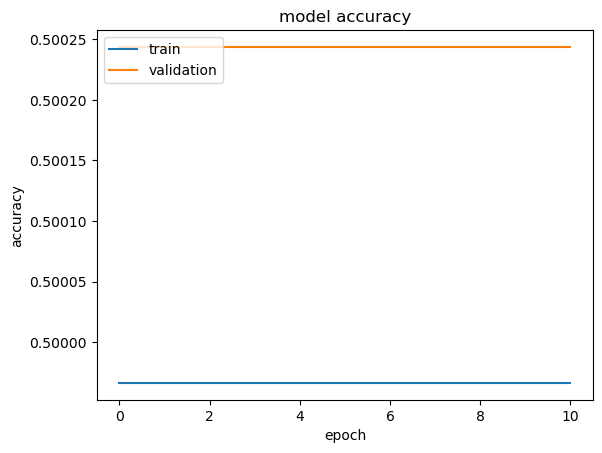

In [183]:
#print("n%s: %.2f%%" % ('val_acc', val_accuracy*100))
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='upper left')
plt.show()

In [25]:
model = Sequential()
model.add(gensim_to_keras_embedding(w2v_model))
model.add(Dense(6,activation='tanh'))
model.add(Dropout(0.3))
model.add(Dense(1,activation='softmax',kernel_regularizer=regularizers.L2(0.01)))

In [26]:
model = Sequential()
model.add(gensim_to_keras_embedding(w2v_model))
model.add(Dense(6,activation='sigmoid'))
model.add(Dropout(0.3))
model.add(Dense(1,activation='softmax',kernel_regularizer=regularizers.L2(0.01)))